In [26]:
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
df = pd.read_csv("medicine/data.csv")

In [29]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,avastin 400mg injection,bevacizumab (400mg),cancer of colon and rectum non-small cell lun...,rectal bleeding taste change headache noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,augmentin 625 duo tablet,amoxycillin (500mg) + clavulanic acid (125mg),treatment of bacterial infections,vomiting nausea diarrhea mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,azithral 500 tablet,azithromycin (500mg),treatment of bacterial infections,nausea abdominal pain diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,ascoril ls syrup,ambroxol (30mg/5ml) + levosalbutamol (1mg/5ml)...,treatment of cough with mucus,nausea vomiting diarrhea upset stomach stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,aciloc 150 tablet,ranitidine (150mg),treatment of gastroesophageal reflux disease (...,headache diarrhea gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [108]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11741 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11741 non-null  object
 1   Composition         11741 non-null  object
 2   Uses                11741 non-null  object
 3   Side_effects        11741 non-null  object
 4   Image URL           11741 non-null  object
 5   Manufacturer        11741 non-null  object
 6   Excellent Review %  11741 non-null  int64 
 7   Average Review %    11741 non-null  int64 
 8   Poor Review %       11741 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [102]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11741.000000,11741.000000,11741.000000
mean,38.505068,35.783494,25.711439
std,25.192156,18.264038,23.949109
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


## Check for NaN values 

In [69]:
df.isna().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

## Check for duplicates

In [72]:
df.duplicated().sum() 

84

In [79]:
df[df.duplicated(keep=False)].sort_values(by='Medicine Name')

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
1120,Amyclox-LB-DS Capsule,Amoxycillin (250mg) + Cloxacillin (250mg) + La...,Bacterial infections,Rash Vomiting Allergic reaction Stomach pain N...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ind Swift Laboratories Ltd,0,0,100
1121,Amyclox-LB-DS Capsule,Amoxycillin (250mg) + Cloxacillin (250mg) + La...,Bacterial infections,Rash Vomiting Allergic reaction Stomach pain N...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ind Swift Laboratories Ltd,0,0,100
955,Apexitra 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Apex Laboratories Pvt Ltd,83,17,0
956,Apexitra 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Apex Laboratories Pvt Ltd,83,17,0
779,Aristogyl-F Oral Suspension,Furazolidone (30mg/5ml) + Metronidazole (100mg...,Diarrhea Dysentery,Nausea Headache Dryness in mouth Metallic tast...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Aristo Pharmaceuticals Pvt Ltd,22,28,50
...,...,...,...,...,...,...,...,...,...
11228,Vomicare Oral Solution,Ondansetron (2mg/5ml),Treatment of Nausea Vomiting,Constipation Diarrhea Fatigue Headache,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Suncare Formulations Pvt Ltd,0,0,100
11405,Xrate Cough Expectorant Sugar Free,Ambroxol (15mg/5ml) + Guaifenesin (50mg/5ml) +...,Cough,Nausea Diarrhea Vomiting Dizziness Headache Ra...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Celsius Healthcare Pvt Ltd,67,33,0
11406,Xrate Cough Expectorant Sugar Free,Ambroxol (15mg/5ml) + Guaifenesin (50mg/5ml) +...,Cough,Nausea Diarrhea Vomiting Dizziness Headache Ra...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Celsius Healthcare Pvt Ltd,67,33,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [80]:
df.drop_duplicates(inplace=True)

## Check for outlier

In [82]:
# Select only numeric columns (int and float types)
df_num = df.select_dtypes(include=['int', 'float'])


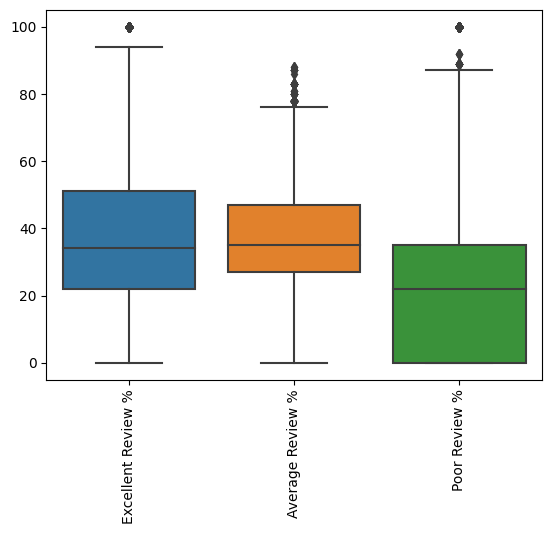

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a boxplot for all numeric columns
sns.boxplot(data=df_num)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [86]:
df_num[df_num['Excellent Review %']>95]

,Excellent Review %,Average Review %,Poor Review %
257,100,0,0
258,100,0,0
437,100,0,0
444,100,0,0
510,100,0,0
...,...,...,...
11799,100,0,0
11805,100,0,0
11810,100,0,0
11812,100,0,0


In [90]:
df_num[df_num['Average Review %']>80]

,Excellent Review %,Average Review %,Poor Review %
316,17,83,0
497,17,83,0
685,0,83,17
795,13,87,0
1364,0,83,17
2069,17,83,0
2221,17,83,0
2503,17,83,0
2912,0,83,17
2945,13,87,0


In [94]:
poor_reviewed_index = df_num[df_num['Poor Review %']>85].index

In [97]:
poor_reviewed_pills= df.loc[poor_reviewed_index]

In [98]:
poor_reviewed_pills

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
24,Aricep 10 Tablet,Donepezil (10mg),Alzheimer's disease,Common cold Urinary incontinence Rash Nausea D...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Eisai Pharmaceuticals India Pvt Ltd,0,0,100
308,Altonil 5 Tablet MD,Melatonin (5mg),Treatment of InsomniaTreatment of Jet lag,Headache Drowsiness,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alteus Biogenics Pvt Ltd,0,0,100
357,Alkasol Oral Solution Sugar Free,Disodium Hydrogen Citrate (1.4gm/5ml),Treatment of GoutTreatment of Kidney stone,Stomach pain Tiredness Diarrhea Nausea Vomitin...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Stadmed Pvt Ltd,0,11,89
412,Avas 40 Tablet,Atorvastatin (40mg),High cholesterolPrevention of Heart attack,Dyspepsia Abdominal pain Indigestion Diarrhea ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,0,0,100
483,Albutamol Neo Syrup,Etofylline (50mg) + Salbutamol (1mg),Treatment of Asthma,Nausea Vomiting Restlessness Tremors Headache ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Centaur Pharmaceuticals Pvt Ltd,0,0,100
...,...,...,...,...,...,...,...,...,...
11662,Zilast 50 Tablet,Cilostazol (50mg),Treatment of Intermittent claudication,Headache Palpitations Abnormal stool Diarrhea ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ipca Laboratories Ltd,0,0,100
11705,Zoryl 3 Tablet,Glimepiride (3mg),Treatment of Type 2 diabetes mellitus,Hypoglycemia low blood glucose level Headache ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Intas Pharmaceuticals Ltd,0,0,100
11735,Zanocin 100 Tablet,Ofloxacin (100mg),Treatment of Bacterial infections,Nausea Headache Dizziness Itching Insomnia dif...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sun Pharmaceutical Industries Ltd,0,0,100
11747,Zatura 250 Tablet,Azithromycin (250mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ajanta Pharma Ltd,0,0,100


## Checking data distribution 

In [103]:
df['Uses'].value_counts()

Uses
Treatment of Type 2 diabetes mellitus                                                   904
Treatment of Bacterial infections                                                       434
 Hypertension (high blood pressure)                                                     403
 Pain relief                                                                            381
Treatment of Hypertension (high blood pressure)                                         277
                                                                                       ... 
 Eye infectionTreatment of Inflammatory conditionsTreatment of Autoimmune conditions      1
 Inflammation of gums Mouth ulcers Mouth infection                                        1
Treatment of Inflammation of gums Local anesthesia (Numb tissues in a specific area)      1
Treatment of Vitamin C deficiency                                                         1
 Blood cancer (Acute lymphocytic leukemia)                                 

In [107]:
df['Composition'].value_counts()

Composition
Luliconazole (1% w/w)                                                                                   98
Levocetirizine (5mg) + Montelukast (10mg)                                                               76
Ketoconazole (2% w/w)                                                                                   61
Domperidone (30mg) + Rabeprazole (20mg)                                                                 59
Itraconazole (100mg)                                                                                    53
                                                                                                        ..
Digoxin (0.25mg)                                                                                         1
Sulphacetamide (20% w/v)                                                                                 1
Furosemide (10mg/ml)                                                                                     1
Chloroquine (500mg)      

In [106]:
df['Manufacturer'].value_counts()

Manufacturer
Sun Pharmaceutical Industries Ltd    819
Intas Pharmaceuticals Ltd            648
Cipla Ltd                            569
Torrent Pharmaceuticals Ltd          441
Lupin Ltd                            432
                                    ... 
Denis Chem Lab Ltd                     1
Shilpex Pharmysis                      1
Romas Remedies                         1
Astech Pharma Pvt Ltd                  1
Minova Life Sciences Pvt Ltd           1
Name: count, Length: 759, dtype: int64

## Checking correlation on the data set , For this dataset no need to check the correlation


In [104]:
df_num.corr() 

,Excellent Review %,Average Review %,Poor Review %
Excellent Review %,1.000000,-0.428875,-0.724835
Average Review %,-0.428875,1.000000,-0.311483
Poor Review %,-0.724835,-0.311483,1.000000


## Normalizing the string data


In [28]:
# Convert relevant columns to lowercase
columns_to_normalize = ['Medicine Name', 'Composition', 'Uses', 'Side_effects']
for column in columns_to_normalize:
    df[column] = df[column].str.lower()

              Medicine Name  \
0   avastin 400mg injection   
1  augmentin 625 duo tablet   
2       azithral 500 tablet   
3          ascoril ls syrup   
4         aciloc 150 tablet   

                                         Composition  \
0                                bevacizumab (400mg)   
1    amoxycillin  (500mg) +  clavulanic acid (125mg)   
2                               azithromycin (500mg)   
3  ambroxol (30mg/5ml) + levosalbutamol (1mg/5ml)...   
4                                 ranitidine (150mg)   

                                                Uses  \
0   cancer of colon and rectum non-small cell lun...   
1                  treatment of bacterial infections   
2                  treatment of bacterial infections   
3                      treatment of cough with mucus   
4  treatment of gastroesophageal reflux disease (...   

                                        Side_effects  \
0  rectal bleeding taste change headache noseblee...   
1  vomiting nausea diarrhea

In [109]:
uni_composition = df.Composition.unique()
uni_composition.shape

(3358,)